In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

In [2]:
result_files = glob.glob("../src/dist/output/analysis/*.json")
result_data = []
files = []
for file in result_files:
    with open(file, "r") as f:
        result_data.append(json.load(f))
        files.append(file)
result_files = files

In [3]:
def get_data_by_filenames(filenames):
    result_datas = []
    for filename in filenames:
        filename = "/" +filename+".json"
        for i, f in enumerate(result_files):
            if filename in f:
                result_datas.append(result_data[i])
                break
    return result_datas

In [4]:
def get_node_load_data(simulationData):
    return simulationData["node-load-list"]

In [5]:
# [file][node][time]の配列に変換
def convert_node_load(data):
    load_data_list = []
    for d in data:
        node_data = get_node_load_data(d)
        load_data = []
        for j in range(len(node_data[0])):
            load_data_per_node = []
            for i in range(len(node_data)):
                load_data_per_node.append(node_data[i][j])
            load_data.append(load_data_per_node)  
        load_data_list.append(load_data)   
    return load_data_list

In [ ]:
# [file][node][time]の配列に変換
def convert_user_connection(data):
    user_data_list = []
    for d in data:
        user_data = data["user-connection-list"]
        connection_data = []
        for j in range(len(user_data[0])):
            load_data_per_node = []
            for i in range(len(connection_data)):
                load_data_per_node.append(connection_data[i][j])
            connection_data.append(load_data_per_node)  
        user_data_list.append(connection_data)   
    return user_data_list

In [6]:
def get_user_connection_data(simulationData):
    return simulationData["user-connection-list"]

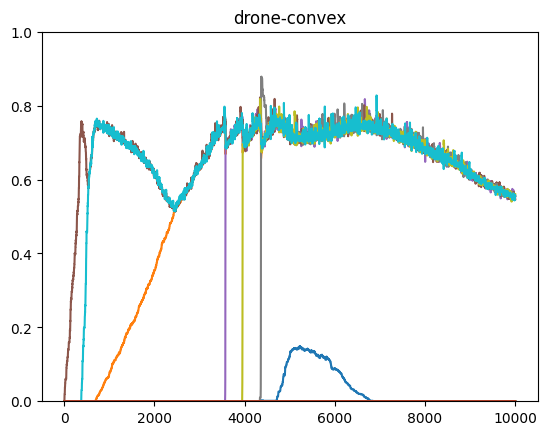

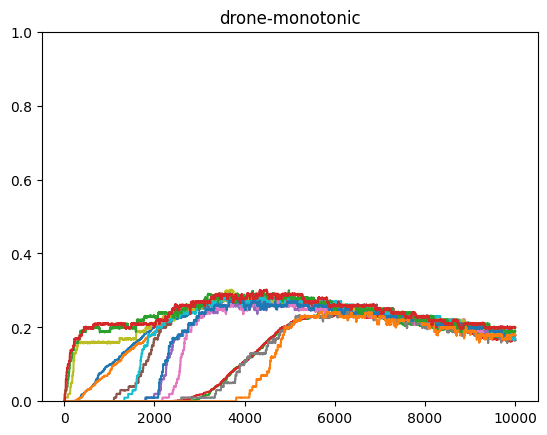

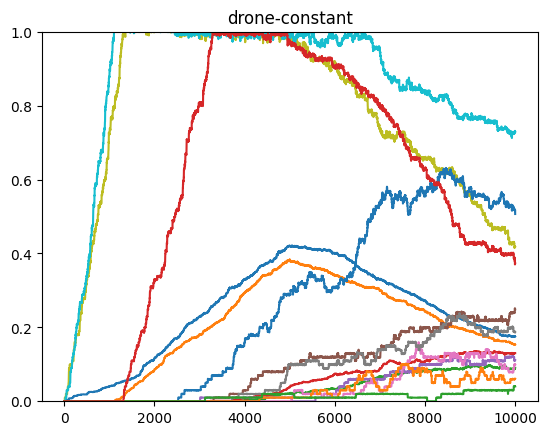

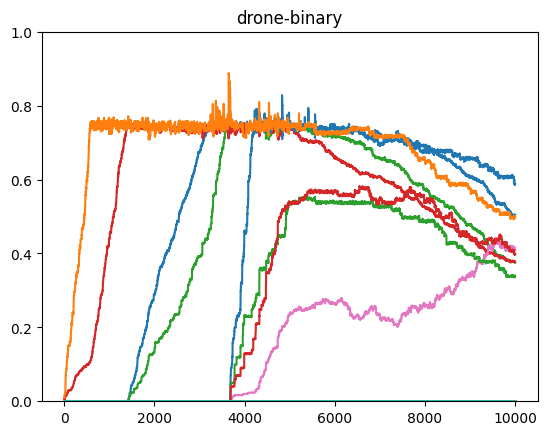

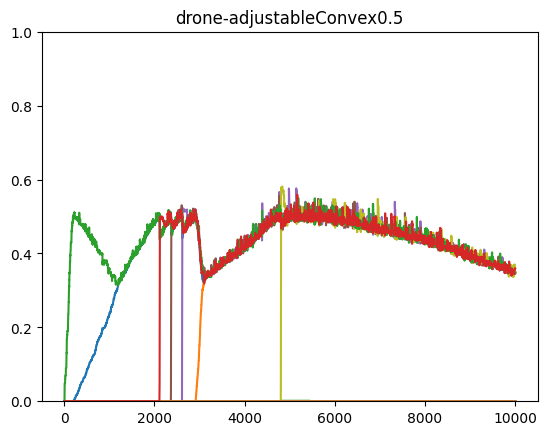

In [7]:
show_files = ["drone-convex", "drone-monotonic", "drone-constant", "drone-binary", "drone-adjustableConvex0.5"]

data = get_data_by_filenames(show_files)
load_data_list = convert_node_load(data)
for i, load_data in enumerate(load_data_list):
    for node in load_data:
        plt.plot(node)
    plt.ylim(0,1)
    plt.title(show_files[i])
    plt.show()

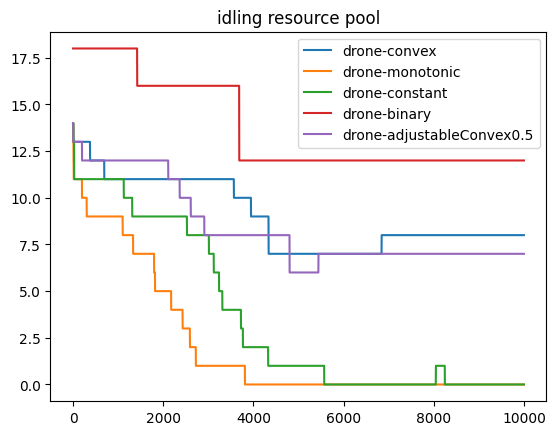

In [64]:
show_files = ["drone-convex", "drone-monotonic", "drone-constant", "drone-binary", "drone-adjustableConvex0.5"]

data = get_data_by_filenames(show_files)
for i,d in enumerate(data): 
    idling_resource_num = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        idling_resource_sum = 0
        for load in timeStepData:
            if load == 0:
                idling_resource_sum +=1
        idling_resource_num.append(idling_resource_sum)
    plt.plot(idling_resource_num, label=show_files[i])
plt.title("idling resource pool")    
plt.legend()
plt.show()

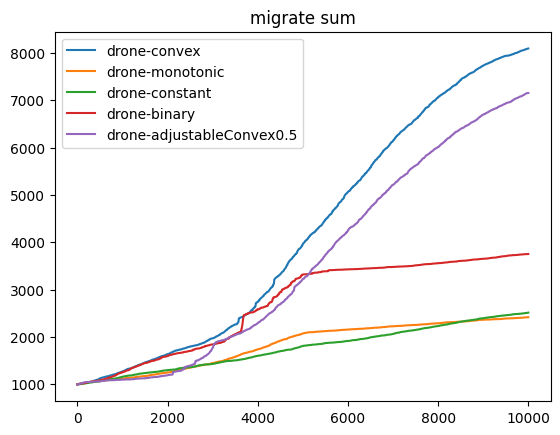

In [65]:
show_files = ["drone-convex", "drone-monotonic", "drone-constant", "drone-binary", "drone-adjustableConvex0.5"]


data = get_data_by_filenames(show_files)
for i, d in enumerate(data):
    user_connection_data = get_user_connection_data(d)
    migrate_sum_list = []
    migrate_sum = 0
    connect_node_list = [-1] * len(user_connection_data[0])
    for timeStepData in user_connection_data:
        for j in range(len(timeStepData)):
            if (connect_node_list[i] == -1) or (connect_node_list[j] == timeStepData[j]):
                pass
            else:
                migrate_sum +=1
            connect_node_list[j] = timeStepData[j]
        migrate_sum_list.append(migrate_sum)
    plt.plot(migrate_sum_list, label=show_files[i])
plt.title("migrate sum")    
plt.legend()
plt.show()

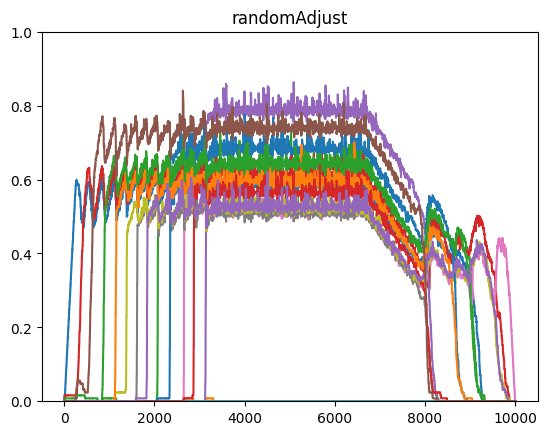

In [66]:
show_files=["randomAdjust"]


data = get_data_by_filenames(show_files)
load_data_list = convert_node_load(data)
for i, load_data in enumerate(load_data_list):
    for node in load_data:
        plt.plot(node)
    plt.ylim(0,1)
    plt.title(show_files[i])
    plt.show()

[0.5984644305661, 0.7273299863828033, 0.6566152675444719, 0.6320654542951805, 0.7994574565438068, 0.5204038327099789, 0.5289034678755851, 0.5265129385804452, 0.5383815421823959, 0.6359578398749741, 0.6984173958372426, 0.6103584539937801, 0.6575360974654316, 0.5809527617942702, 0.5423464289689099, 0.7540441167483556]


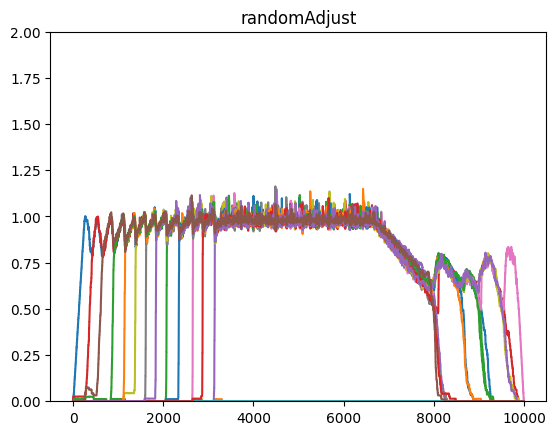

In [67]:
show_files=["randomAdjust"]

data = get_data_by_filenames(show_files)
load_data_list = convert_node_load(data)
load_threshold_list = data[0]["node-load-threshold-list"]
print(load_threshold_list)
for i, load_data in enumerate(load_data_list):
    for j, node in enumerate(load_data):
        node = [n/load_threshold_list[j] for n in node]
        plt.plot(node)
    plt.ylim(0,2)
    plt.title(show_files[i])
    plt.show()

In [ ]:
show_files=["distance-threshold"]

data = get_data_by_filenames(show_files)
load_data_list = convert_node_load(data)
load_threshold_list = data[0]["node-load-threshold-list"]
print(load_threshold_list)
for i, load_data in enumerate(load_data_list):
    for j, node in enumerate(load_data):
        node = [n/load_threshold_list[j] for n in node]
        plt.plot(node)
    plt.ylim(0,2)
    plt.title(show_files[i])
    plt.show()